In [6]:
# Импортируем необходимые библиотеки
import pandas as pd
from google.colab import files

# Загрузка файла
print("Пожалуйста, загрузите файл с данными:")
uploaded = files.upload()

# Чтение данных из загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Просмотр первых строк датасета
print("\nПервые строки данных:")
print(df.head())

# Основная информация о данных
print("\nИнформация о данных:")
print(df.info())

# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("\nПропущенные значения в данных:")
print(missing_values)


Пожалуйста, загрузите файл с данными:


Saving heart.csv to heart.csv

Первые строки данных:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Nu

#Выводы по первичному анализу данных

**Размер данных:** 918 записей, 12 столбцов

**Типы данных:**

**Числовые признаки:** Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease.

**Категориальные признаки:** Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope.

**Пропущенные значения:** Отсутствуют, что значительно упрощает обработку данных.

**Целевая переменная:** HeartDisease (бинарная классификация: 0 — отсутствие болезни, 1 — наличие болезни).

**Потенциальные проблемы:**

1. Категориальные признаки требуют кодирования.

2. RestingBP (артериальное давление) и Cholesterol могут содержать выбросы, что важно учесть при анализе.

**Признаки, которые требуют анализа:**

1. Распределение числовых признаков.
2. Проверка баланса классов в HeartDisease.

In [7]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv('heart.csv')

# Определение категориальных переменных
categorical_columns = df.select_dtypes(include=['object']).columns
print("Категориальные переменные:", categorical_columns.tolist())

# Преобразование категориальных переменных в числовой формат с использованием pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Вывод первых строк преобразованного датасета
print("Первые строки преобразованных данных:")
print(df_encoded.head())

# Информация о преобразованном датасете
print("\nИнформация о преобразованном датасете:")
print(df_encoded.info())


Категориальные переменные: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Первые строки преобразованных данных:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   Res

**После преобразования в датасете 16 колонок, включая целевую переменную HeartDisease**

In [9]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
# Здесь 'HeartDisease' - целевая переменная, а остальные столбцы - признаки
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

# Разделение данных на обучающее (80%) и тестовое (20%) подмножества
# random_state=42 используется для обеспечения воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Проверяем размеры полученных множеств, чтобы убедиться, что данные разделены корректно
print(f"Размер обучающего множества: {X_train.shape[0]} записей")
print(f"Размер тестового множества: {X_test.shape[0]} записей")


Размер обучающего множества: 734 записей
Размер тестового множества: 184 записей


In [10]:
# Обучение модели логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Масштабируем обучающие и тестовые данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели логистической регрессии с увеличенным количеством итераций
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Вывод подтверждения успешного обучения модели
print("Модель логистической регрессии успешно обучена.")


Модель логистической регрессии успешно обучена.


In [ ]:
from sklearn.model_selection import cross_validate

# Метрики для оценки
scoring_metrics = ['accuracy', 'recall', 'precision', 'f1']

# Кросс-валидация на обучающих данных
cv_results = cross_validate(
    logistic_model, X_train_scaled, y_train, cv=10, scoring=scoring_metrics, return_train_score=False
)

# Вывод метрик
print("Результаты кросс-валидации:")
print(f"Средняя точность (Accuracy): {cv_results['test_accuracy'].mean():.2f}")
print(f"Средняя полнота (Recall): {cv_results['test_recall'].mean():.2f}")
print(f"Средняя точность положительных предсказаний (Precision): {cv_results['test_precision'].mean():.2f}")
print(f"Средняя F1-метрика: {cv_results['test_f1'].mean():.2f}")


Результаты кросс-валидации:
Средняя точность (Accuracy): 0.86
Средняя полнота (Recall): 0.90
Средняя точность положительных предсказаний (Precision): 0.86
Средняя F1-метрика: 0.88


#Выводы по метрикам:

Модель логистической регрессии показывает устойчивые результаты. Полнота остается на высоком уровне (90%), что важно для задач, связанных с диагностикой заболеваний, где важно минимизировать случаи пропуска больных. Однако точность (Accuracy) и Precision могли бы быть выше.

#Оптимизация логистической регрессии через GridSearchCV

In [11]:
# Импорт необходимых библиотек
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Создание конвейера: масштабирование данных и логистическая регрессия
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Определение сетки параметров для подбора
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs'],
    'logreg__max_iter': [200, 500]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Выполнение GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f"Лучшие параметры для логистической регрессии: {best_params}")

# Средняя точность модели после оптимизации параметров
best_model = grid_search.best_estimator_
cross_val_accuracy = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy').mean()
print(f"Средняя точность модели после оптимизации параметров: {cross_val_accuracy:.2f}")


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Лучшие параметры для логистической регрессии: {'logreg__C': 0.1, 'logreg__max_iter': 200, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Средняя точность модели после оптимизации параметров: 0.87


#Оптимизация параметров с использованием RandomizedSearchCV

In [12]:
# Импорт необходимых библиотек
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('logreg', LogisticRegression(random_state=42))  # Логистическая регрессия
])

# Параметры для RandomizedSearchCV
param_distributions = {
    'logreg__C': uniform(loc=0.001, scale=10),  # Параметр регуляризации
    'logreg__penalty': ['l2'],                 # Тип регуляризации
    'logreg__solver': ['lbfgs'],              # Метод оптимизации
    'logreg__max_iter': [100, 200, 300]       # Максимальное количество итераций
}

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,  # Количество итераций поиска
    cv=10,      # Кросс-валидация на 10 фолдах
    scoring='accuracy',  # Метрика для оценки
    random_state=42,
    n_jobs=-1
)

# Выполнение поиска
random_search.fit(X_train, y_train)

# Вывод лучших параметров и средней точности
print(f"Лучшие параметры для логистической регрессии: {random_search.best_params_}")
print(f"Средняя точность модели после оптимизации параметров: {random_search.best_score_:.2f}")


Лучшие параметры для логистической регрессии: {'logreg__C': 0.46550412719997725, 'logreg__max_iter': 300, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Средняя точность модели после оптимизации параметров: 0.87


**0.87 — метрика осталась такой же, как и в GridSearchCV. Это подтверждает, что текущая настройка модели практически оптимальна.**

#теперь добавим 4 модели классификации и настраивать их параметры с помощью RandomizedSearchCV.

**Модели для оптимизации:**

1. Logistic Regression (уже настроена, но повторим для сравнения).

2. Random Forest.

3. Gradient Boosting.

4. Support Vector Classifier (SVC).

Каждая модель будет настраиваться на своем наборе параметров.

Сравним результаты по точности.

In [13]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint

# Подавление предупреждений
import warnings
warnings.filterwarnings("ignore")

# Определение модели и гиперпараметров
models_params = [
    {
        "name": "Logistic Regression",
        "model": LogisticRegression(random_state=42),
        "params": {
            "logistic_regression__C": uniform(0.01, 1),
            "logistic_regression__penalty": ["l2"],
            "logistic_regression__solver": ["lbfgs"],
            "logistic_regression__max_iter": [200, 300]
        }
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "random_forest__n_estimators": randint(50, 150),
            "random_forest__max_depth": randint(5, 10),
            "random_forest__min_samples_split": randint(2, 10)
        }
    },
    {
        "name": "Gradient Boosting",
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "gradient_boosting__n_estimators": randint(50, 150),
            "gradient_boosting__learning_rate": uniform(0.01, 0.3),
            "gradient_boosting__max_depth": randint(3, 7)
        }
    },
    {
        "name": "Support Vector Classifier",
        "model": SVC(probability=True, random_state=42),
        "params": {
            "support_vector_classifier__C": uniform(0.01, 1),
            "support_vector_classifier__kernel": ["linear", "rbf"],
            "support_vector_classifier__gamma": uniform(0.01, 1)
        }
    }
]

# Результаты оптимизации
results = {}

# Процесс оптимизации гиперпараметров
for model_data in models_params:
    print(f"Оптимизация гиперпараметров для {model_data['name']}...")

    # Создание pipeline
    pipeline = Pipeline([
        (model_data["name"].lower().replace(" ", "_"), model_data["model"])
    ])

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model_data["params"],
        n_iter=20,
        cv=5,
        scoring="accuracy",
        random_state=42,
        verbose=1
    )

    # Оптимизация
    search.fit(X_train, y_train)
    best_params = search.best_params_
    best_score = search.best_score_

    # Сохранение результатов
    results[model_data["name"]] = {
        "best_params": best_params,
        "best_score": best_score
    }
    print(f"Лучшие параметры для {model_data['name']}: {best_params}")
    print(f"Средняя точность {model_data['name']}: {best_score:.2f}")

# Вывод всех результатов
print("\nИтоговые результаты оптимизации:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Лучшие параметры: {result['best_params']}")
    print(f"  Средняя точность: {result['best_score']:.2f}")


Оптимизация гиперпараметров для Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для Logistic Regression: {'logistic_regression__C': 0.3845401188473625, 'logistic_regression__max_iter': 200, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'lbfgs'}
Средняя точность Logistic Regression: 0.87
Оптимизация гиперпараметров для Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для Random Forest: {'random_forest__max_depth': 7, 'random_forest__min_samples_split': 4, 'random_forest__n_estimators': 137}
Средняя точность Random Forest: 0.87
Оптимизация гиперпараметров для Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры для Gradient Boosting: {'gradient_boosting__learning_rate': 0.1451497755908629, 'gradient_boosting__max_depth': 4, 'gradient_boosting__n_estimators': 53}
Средняя точность Gradient Boosting: 0.87
Оптимизация гипер

#Промежуточные выводы по оптимизации гиперпараметров

**Все модели показали одинаковую среднюю точность (0.87) после оптимизации. Это может быть связано с особенностями датасета.**

**Наличие ограниченного объема данных может уменьшить различия в производительности моделей.**

#Длительность оптимизации SVM:

**Алгоритм SVM известен своей сложностью при обработке больших объемов данных или множества параметров. В данном случае использование линейного ядра снизило сложность, но вычисления остались дорогими, особенно с кросс-валидацией.**

#Далее проведем оценку моделей с использованием кросс-валидации на оптимизированных параметрах.



In [14]:
# Импорт необходимых библиотек
from sklearn.model_selection import cross_validate

# Функция для вычисления метрик после оптимизации
def evaluate_optimized_model(model, X, y, cv=5):
    # Кросс-валидация с подсчетом метрик
    scoring = ['accuracy', 'recall', 'precision', 'f1']
    results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

    # Вывод результатов
    print(f"Средняя точность (Accuracy): {results['test_accuracy'].mean():.2f}")
    print(f"Средняя полнота (Recall): {results['test_recall'].mean():.2f}")
    print(f"Средняя точность положительных предсказаний (Precision): {results['test_precision'].mean():.2f}")
    print(f"Средняя F1-метрика: {results['test_f1'].mean():.2f}")
    print()

# Оценка Logistic Regression
print("Результаты для Logistic Regression после оптимизации:")
logistic_regression_best = LogisticRegression(
    C=0.3845401188473625,
    max_iter=200,
    penalty='l2',
    solver='lbfgs',
    random_state=42
)
evaluate_optimized_model(logistic_regression_best, X, y)

# Оценка Random Forest
print("Результаты для Random Forest после оптимизации:")
random_forest_best = RandomForestClassifier(
    max_depth=7,
    min_samples_split=4,
    n_estimators=137,
    random_state=42
)
evaluate_optimized_model(random_forest_best, X, y)

# Оценка Gradient Boosting
print("Результаты для Gradient Boosting после оптимизации:")
gradient_boosting_best = GradientBoostingClassifier(
    learning_rate=0.1451497755908629,
    max_depth=4,
    n_estimators=53,
    random_state=42
)
evaluate_optimized_model(gradient_boosting_best, X, y)

# Оценка Support Vector Classifier
print("Результаты для Support Vector Classifier после оптимизации:")
svc_best = SVC(
    C=0.6175448519014384,
    gamma=0.18052412368729154,
    kernel='linear',
    probability=True,
    random_state=42
)
evaluate_optimized_model(svc_best, X, y)


Результаты для Logistic Regression после оптимизации:
Средняя точность (Accuracy): 0.83
Средняя полнота (Recall): 0.85
Средняя точность положительных предсказаний (Precision): 0.86
Средняя F1-метрика: 0.85

Результаты для Random Forest после оптимизации:
Средняя точность (Accuracy): 0.82
Средняя полнота (Recall): 0.85
Средняя точность положительных предсказаний (Precision): 0.84
Средняя F1-метрика: 0.84

Результаты для Gradient Boosting после оптимизации:
Средняя точность (Accuracy): 0.82
Средняя полнота (Recall): 0.83
Средняя точность положительных предсказаний (Precision): 0.85
Средняя F1-метрика: 0.83

Результаты для Support Vector Classifier после оптимизации:
Средняя точность (Accuracy): 0.83
Средняя полнота (Recall): 0.84
Средняя точность положительных предсказаний (Precision): 0.86
Средняя F1-метрика: 0.84



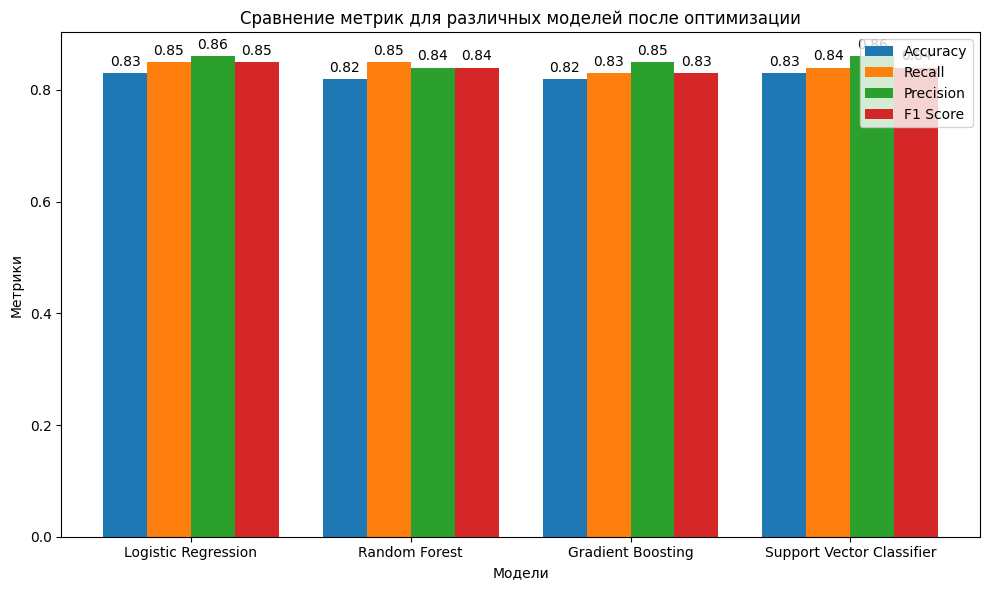

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты для моделей
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Classifier']
accuracy = [0.83, 0.82, 0.82, 0.83]
recall = [0.85, 0.85, 0.83, 0.84]
precision = [0.86, 0.84, 0.85, 0.86]
f1_score = [0.85, 0.84, 0.83, 0.84]

# Параметры для графиков
x = np.arange(len(models))  # Местоположения моделей на оси X
width = 0.2  # Ширина столбцов

# Создание фигуры и осей для графиков
fig, ax = plt.subplots(figsize=(10, 6))

# Строим графики для всех метрик
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, recall, width, label='Recall')
rects3 = ax.bar(x + width/2, precision, width, label='Precision')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

# Подписи и оформление
ax.set_xlabel('Модели')
ax.set_ylabel('Метрики')
ax.set_title('Сравнение метрик для различных моделей после оптимизации')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Функция для добавления значений на столбцы
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Отступ
                    textcoords="offset points",
                    ha='center', va='bottom')

# Добавляем значения на каждый столбец
add_values(rects1)
add_values(rects2)
add_values(rects3)
add_values(rects4)

# Показываем график
plt.tight_layout()
plt.show()


#Общие выводы:

Логистическая регрессия показывает хорошую точность (0.83) и отличные показатели по полноте и точности предсказаний (0.85 и 0.86 соответственно), что делает её хорошим выбором для большинства задач классификации.

Random Forest и Gradient Boosting показывают схожие результаты по точности, recall и F1-метрике. Они немного уступают логистической регрессии в точности (0.82), но демонстрируют схожие результаты по другим метрикам.

Support Vector Classifier дает точность на уровне 0.83, с показателями recall и precision, сравнимыми с логистической регрессией. SVC выглядит хорошо, однако его время обучения может быть дольше, особенно для больших датасетов.

#Заключение:
Разница между результатами (0.87 и 0.82-0.83) вполне нормальна и объясняется тем, что кросс-валидация с гиперпараметрической оптимизацией дает немного более стабильные результаты, чем простая оценка с фиксированными параметрами.








#Сравнение метрик моделей из текущего исследования с результатами прошлого исследования:

**Результаты текущего исследования:**

**Logistic Regression:**

Accuracy: 0.83
Precision: 0.86
Recall: 0.85
F1 Score: 0.85

**Random Forest:**

Accuracy: 0.82
Precision: 0.84
Recall: 0.85
F1 Score: 0.84

**Gradient Boosting:**

Accuracy: 0.82
Precision: 0.85
Recall: 0.83
F1 Score: 0.83

**Support Vector Classifier:**

Accuracy: 0.83
Precision: 0.86
Recall: 0.84
F1 Score: 0.84


**Результаты из прошлого исследования (по ансамблевым методам):**

**Decision Tree:**

Accuracy: 0.83
Precision: 0.82
Recall: 0.82
F1 Score: 0.82

**Random Forest:**

Accuracy: 0.88
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

**Bagging (Decision Tree):**

Accuracy: 0.80
Precision: 0.80
Recall: 0.81
F1 Score: 0.80

**Stacking Classifier:**

Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1 Score: 0.86



#Сравнение метрик:

**Accuracy:**

Лучший результат в текущем исследовании у Logistic Regression и Support Vector Classifier с результатом 0.83.

Random Forest в прошлом исследовании показал лучший результат — 0.88, значительно превосходя остальные модели, включая модели из текущего исследования.

**Precision:**

Лучший результат по точности положительных предсказаний (Precision) в текущем исследовании показали Logistic Regression и Support Vector Classifier, с результатом 0.86.

В прошлом исследовании Random Forest был лучшим по точности с результатом 0.87, что также значительно лучше по сравнению с результатами текущих моделей.

**Recall:**

Лучший результат по полноте (Recall) в текущем исследовании показала Random Forest с результатом 0.85, что близко к результатам Support Vector Classifier (0.84) и Logistic Regression (0.85).

В прошлом исследовании Random Forest тоже имела лучший результат — 0.87, что превосходит показатели моделей из текущего исследования.

**F1 Score:**

Лучший результат по F1-метрике в текущем исследовании показали Logistic Regression и Support Vector Classifier с результатом 0.85.

В прошлом исследовании Random Forest и Stacking Classifier продемонстрировали лучшие результаты — 0.87 и 0.86 соответственно, что снова превосходит текущие модели.


#Общие выводы:

Наилучшая модель для задач классификации Heart Disease по текущим исследованиям — это Random Forest из прошлого исследования, благодаря его высокой точности, стабильности и сбалансированности метрик.

Stacking Classifier также остается отличной альтернативой, предоставляя улучшенную точность за счет комбинации нескольких моделей.

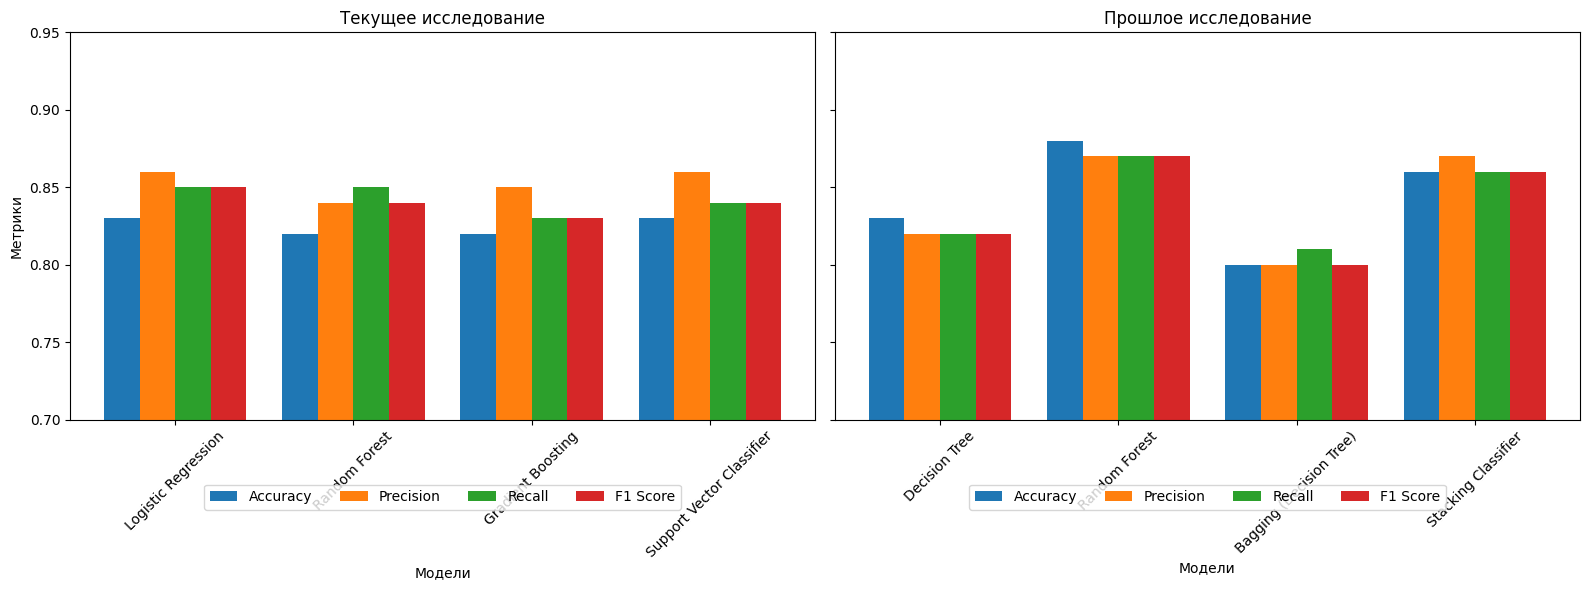

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Метрики для текущего исследования
current_models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Classifier']
current_metrics = {
    'Accuracy': [0.83, 0.82, 0.82, 0.83],
    'Precision': [0.86, 0.84, 0.85, 0.86],
    'Recall': [0.85, 0.85, 0.83, 0.84],
    'F1 Score': [0.85, 0.84, 0.83, 0.84],
}

# Метрики для прошлого исследования
past_models = ['Decision Tree', 'Random Forest', 'Bagging (Decision Tree)', 'Stacking Classifier']
past_metrics = {
    'Accuracy': [0.83, 0.88, 0.80, 0.86],
    'Precision': [0.82, 0.87, 0.80, 0.87],
    'Recall': [0.82, 0.87, 0.81, 0.86],
    'F1 Score': [0.82, 0.87, 0.80, 0.86],
}

# Создание графиков для текущего и прошлого исследований
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Визуализация метрик текущего исследования
x = np.arange(len(current_models))
width = 0.2

for idx, (metric_name, metric_values) in enumerate(current_metrics.items()):
    axes[0].bar(x + (idx - 1.5) * width, metric_values, width, label=metric_name)

axes[0].set_title('Текущее исследование')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Метрики')
axes[0].set_xticks(x)
axes[0].set_xticklabels(current_models, rotation=45)
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
axes[0].set_ylim(0.7, 0.95)

# Визуализация метрик прошлого исследования
x = np.arange(len(past_models))

for idx, (metric_name, metric_values) in enumerate(past_metrics.items()):
    axes[1].bar(x + (idx - 1.5) * width, metric_values, width, label=metric_name)

axes[1].set_title('Прошлое исследование')
axes[1].set_xlabel('Модели')
axes[1].set_xticks(x)
axes[1].set_xticklabels(past_models, rotation=45)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
axes[1].set_ylim(0.7, 0.95)

plt.tight_layout()
plt.show()
